# Introduction to Bayesian Data Analysis - Applied Version


<img src="results\figures\presentation\1.png" width="500" height="500" align="center"/>


### Valerio Bonometti                                                                                    
**PhD Candidate University of York**  
**Workshop Repository:** https://github.com/vb690/introduction_bayesian_analysis

## Agenda

* Introduction
 
* Bayesian Approach to Inference

    * Counts
    * Updating Counts
    * From Counts to Probability
    * Likelihood, Parameters, Prior and Posterior 
    * Parameters Estimation
    * Bayesian Models
    
* PyMC3
    
    * Model Building 
    * Model Inspecting
    * Model Fitting
    * Model Evaluating and Comparing
    * Model Predicting
    
* Applications
    
    * PyMC3 vs scikit-learn
    * Web Traffic Estimation
    * Advertising Effect on Revenue
    * Game Difficulty Estimation
    * Model Comparison

## Introduction

### Introduction - Books

* [Statistical Rethinking 1st Edition (Chapters: 2, 3 and 4)](https://xcelab.net/rm/statistical-rethinking/)
* [Bayesian Data Analysis](http://www.stat.columbia.edu/~gelman/book/)
* Edwin Thompson Jayne

### Introduction -  Online Material

* [Statistical Rethinking using PyMC3](https://github.com/pymc-devs/resources/tree/master/Rethinking_2)
* PyMC3 [tutorials](https://docs.pymc.io/nb_tutorials/index.html) and [learning materials](https://docs.pymc.io/learn.html)

### Introduction -  Libraries

* Core (Sections 1, 2)
    * Numpy
    * Scipy
    * Matplolib 

* Extended (Section 3)
     * PyMC3
     * Theano (can be painful on Windows)
     * Seaborn

In [1]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm

import numpy as np
from scipy.stats import binom, beta, norm

from sklearn.datasets import make_regression

import pymc3 as pm

import matplotlib.pyplot as plt
import seaborn as sns

## Bayesian Approach to Inference

### *Bayesian approach to inference is all about computing plausibility of hypothesis given prior beliefs and data*

### Bayesian Approach to Inference - Counts


| Number of Reviews | Number of Outcomes | Reviews Outcomes |
| --- | --- | --- |
| 4 | 3 | Good, Bad, Good |


#### <center> What is the proportion of good reviews ? <center>

<br/>

| HYPOTHESIS | NUMBER OF WAYS [Good, Bad, Good] CAN APPEAR |
| --- | --- |
| 0.0 | 0 |
| 0.25 | 3 |
| 0.50 | 8 |
| **0.75** | **9**|
| 1.0 | 0 |
    
See [Gelman and Loken](http://www.stat.columbia.edu/~gelman/research/unpublished/p_hacking.pdf)

### Bayesian Approach to Inference - Updating Counts

#### <center> A new review is observed and it is Bad <center>


| HYPOTHESIS | PRIOR BELIEF| NUMBER OF WAYS [Bad] CAN APPEAR |  WAYS X PRIOR|
| --- | --- | --- | --- |
| 0.0 | 0 | 4 | 0 |
| 0.25 | 3 | 3 | 9 |
| **0.50** | **8** | **2** | **16** |
| 0.75 | 9| 1 | 9 |
| 1.0 | 0 | 0 | 0 |

### Bayesian Approach to Inference - From Counts to Probability

<br/>
<br/>

<center> $Posterior = \frac{Likelihood \times Prior}{Average \, Likelihood}$  <center>

<br/>
<br/>
    
<center> $Pr(Parameter |  Data) = \frac{Pr(Data | Parameter) \times Pr(Parameter)}{Pr(Data)}$ <center>
    
<br/>
<br/>

<center> $Pr(Hypothesis |  Reviews \, Outcomes) = \frac{WAYS \times PRIOR}{Normalizing}$ <center>
    
<br/>
<br/>

<center> $Pr(0.50 | Bad) = \frac{2 \times 8}{34}$ <center>


### Bayesian Approach to Inference - From Counts to Probability

| HYPOTHESIS | PRIOR BELIEF| NUMBER OF WAYS [Bad] CAN APPEAR |  $\frac{WAYS \times PRIOR}{Normalizing}$|
| --- | --- | --- | --- |
| 0.0 | 0 | 4 | 0 |
| 0.25 | 3 | 3 | 0.26 |
| 0.50 | 8 | 2 | 0.47 |
| 0.75 | 9| 1 | 0.26 |
| 1.0 | 0 | 0 | 0 |

<img src="results\figures\presentation\applied\1.png" width="400" height="400" align="center"/>

C:\Users\valeriob\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


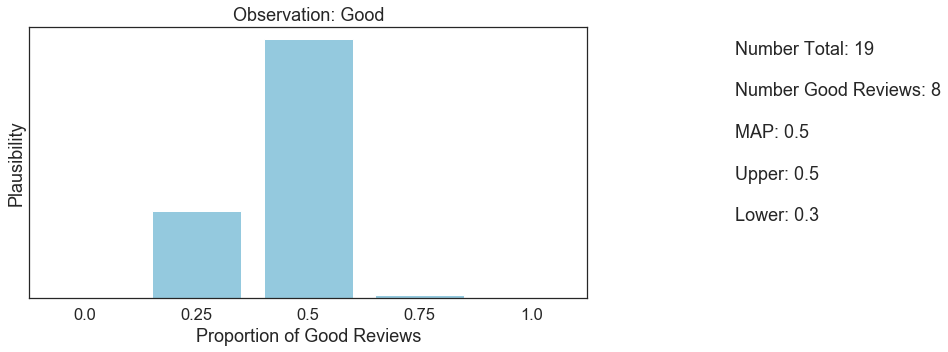

In [52]:
from modules.visuals import visualize_binomial_update

visualize_binomial_update(
    n_tests=20, 
    parameter_name='Good Reviews',
    remapper={0: 'Bad', 1: 'Good'},
    parameter_space=np.linspace(0, 1, 5),
    figsize=(10, 5),
    hist=True,
    auto=True,
    color='skyblue'
)

### Bayesian Approach to Inference - Likelihood, Parameters, Prior, Posterior

<br/>
<br/>

<center> $Posterior = \frac{Likelihood \times Prior}{Average \, Likelihood}$  <center>

#### Likelihood is a function explaining the plausibility of data given a data-generating process

Plausibility of observing **333** good reviews out of **656** total **assuming** a proportion of good reviews of **0.5**?

<center> $Observed\, Good\, Reviews \sim B(Total\, Reviews, Proportion)$  <center>
<center> $333 \sim B(656, 0.5)$  <center>

<center>$Pr(Good | Total, Proportion)$ = $PMF(Good)$ given $B(Total, Proportion)$  <center>
<center>$Pr(333 | 656, 0.5)$ = $PMF(333)$ given $B(656, 0.5)$  <center>

#### Likelihood function are defined by parameters, which are hypothesis on the data-generating process.

How the plausibility of observing **333** good reviews out of **656** total **varies** assuming proportion of good reviews that consider all the values going from **0.0** to **1.0**?

<center> $Pr(333 | 656, 0.0)$  <center>
<center> $Pr(333 | 656, 0.1)$  <center>
<center> $Pr(333 | 656, 0.2)$  <center>
<center> ...  <center>

<img src="results\figures\presentation\applied\2.png" width="400" height="400" align="center"/>

#### Prior is the initial set of plausibility that each value of the paramter to estimate can assume

Without seeing any data I can assume that there is **nearly zero** plausibility that the proportion of good reviews is **0.0** or **1.0**

$Beta(\alpha, \beta)$

<img src="results\figures\presentation\applied\3.png" width="500" height="500" align="center"/>

#### Posterior is the relatively plausibility of the parameters to estimate conditioned on the observed data
After seeing some data I update my prior. Now it is more plausibile that the proportion of Good reviews is close to 1.0

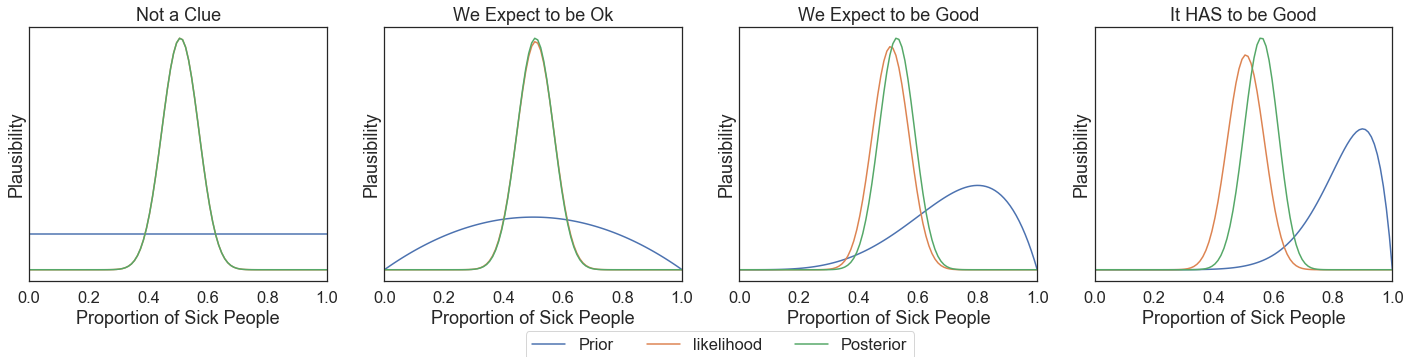

In [3]:
from modules.visuals import visualize_priors_effect

TOTAL_REVIEWS = 65
GOOD_REVIEWS = 33

PARAMETER_SPACE = np.linspace(0, 1, 100)
PRIORS = {
    'Not a Clue': np.array([1] * len(PARAMETER_SPACE)),
    'We Expect to be Ok': beta(2, 2).pdf(PARAMETER_SPACE),
    'We Expect to be Good': beta(5, 2).pdf(PARAMETER_SPACE),
    'It HAS to be Good': beta(10, 2).pdf(PARAMETER_SPACE),
}

visualize_priors_effect(
    parameter_space=PARAMETER_SPACE,
    priors=PRIORS,
    likelihood=binom.pmf(GOOD_REVIEWS, TOTAL_REVIEWS, p=PARAMETER_SPACE),
    figsize=(20, 5)
)

### Bayesian Approach to Inference - Parameters Estimation


#### Prior, Likelihood and Posterior are all components aimed to do one thing: 
   
#### Define a model for a data generation process and estimate the plausibility of all the values the parameters of the model can assume, not just finding the most probable one.

### Bayesian Approach to Inference - Models 

A Western traveler asks an Oriental philosopher to describe the nature of the world:  
  
“It is a great ball resting on the flat back of the world turtle.”  
“Ah yes, but what does the world turtle stand on?”  
“On the back of a still larger turtle.”  
“Yes, but what does he stand on?”  
“A very perceptive question. But it’s no use, mister; it’s turtles all the way down.”

<br/>

<img src="results\figures\presentation\6.jpg" width="300" height="300" align="center"/>

<br/>

### Bayesian Approach to Inference - Parameters and Distributions all the Way Down

<br/>

#### <center> What is the proportion of good reviews <center>

<br/>

<center> $p \sim Beta(\alpha, \beta)$ <center>
<center> $outcome \sim B(n, p)$ <center>

<br/>

<img src="results\figures\presentation\8.png" width="200" height="200" align="center"/> 

### Bayesian Approach to Inference - Parameters and Distributions all the Way Down

<br />
<center> $\alpha \sim HalfNormal(\sigma_\alpha)$ <center>
<center> $\beta \sim HalfNormal(\sigma_\beta)$ <center>
<center> $p \sim Beta(\alpha, \beta)$ <center>
<center> $outcome \sim B(n, p)$ <center>

<img src="results\figures\presentation\9.png" width="300" height="300" align="center"/> 

## PyMC3

### High level framework:

### 1. Bayesian modelling and probabilistic machine learning 
### 2. Built on top of Theano
### 3. Computational graphs and fast(er) inferecne

### PyMC3 - Model Building
#### <center> What is the proportion of good reviews after observing 333 of them out of 656 total ?<center>

<center> $proportion \sim Beta(\alpha, \beta)$ <center>
<center> $good\, reviews \sim B(total\, reviews, proportion)$ <center>

```python
TOTAL_REVIEWS = 656
GOOD_REVIEWS = 333

with pm.Model() as p_esitmation_model:
    
    # prior distribution of the paramter to estimate
    theta = pm.Beta(
        alpha=2,
        beta=2,
        name='parameter_p'
    )
```
```python
    # the outocme distribution
    outcome = pm.Binomial(
        p=theta,
        observed=GOOD_REVIEWS,
        n=TOTAL_REVIEWS,
        name='outcome'
    )
```

### PyMC3 - Model Building
#### <center> What is the number of total reviews and the proportion of good reviews after observing 333 of them?<center>

<center> $proportion \sim Beta(\alpha, \beta)$ <center>
<center> $total\, reviews \sim Uniform(lower, upper)$ <center>    
<center> $good\, reviews \sim B(total\, reviews, proportion)$ <center>

In [63]:
GOOD_REVIEWS = 333

def build_model(observed):
    """
    Function for building a PyMC3 model
    
    Arguments:
        observed: value or array of values, data to fit the model on
    
    Returns:
        estimation_model: A PyMC3 model
    """
    with pm.Model() as esitmation_model:

        # prior distribution of the paramter to estimate
        p = pm.Beta(
            alpha=5,
            beta=5,
            name='parameter_p'
        )

        # prior distribution of the paramter to estimate
        n = pm.DiscreteUniform(
            lower=600,
            upper=700,
            name='parameter_n'
        )

        # the outocme distribution
        outcome = pm.Binomial(
            p=p,
            observed=GOOD_REVIEWS,
            n=n,
            name='outcome'
        )
    
    return esitmation_model

### PyMC3 - Model Inspecting

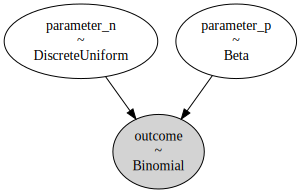

In [64]:
with build_model(GOOD_REVIEWS):
    
    graph  = pm.model_graph.model_to_graphviz()

graph

### PyMC3 - Model Inspecting

In [65]:
with build_model(GOOD_REVIEWS):
    
    prior_checks = pm.sample_prior_predictive(
        samples=1000
    )

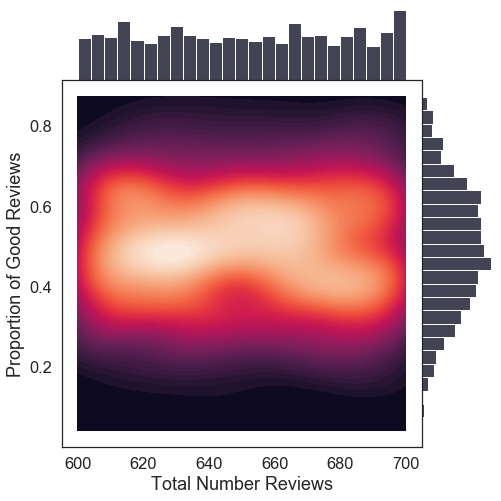

In [66]:
from modules.visuals import visualize_bivariate_parameter_grid

visualize_bivariate_parameter_grid(
    parameter_1=prior_checks['parameter_n'], 
    parameter_2=prior_checks['parameter_p'],
    parameter_1_name='Total Number Reviews', 
    parameter_2_name='Proportion of Good Reviews',
    height=7
)

### PyMC3 - Model Fitting

In [72]:
with build_model(GOOD_REVIEWS):
    
    # find the posterior distribution using MCMC 
    train_traces = pm.sample(
        draws=5000,
        chains=6,
        tune=6000,
        cores=1
    )

Sequential sampling (6 chains in 1 job)
CompoundStep
>NUTS: [parameter_p]
>Metropolis: [parameter_n]


Sampling 6 chains for 6_000 tune and 5_000 draw iterations (36_000 + 30_000 draws total) took 63 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


### PyMC3 - Model Evaluating

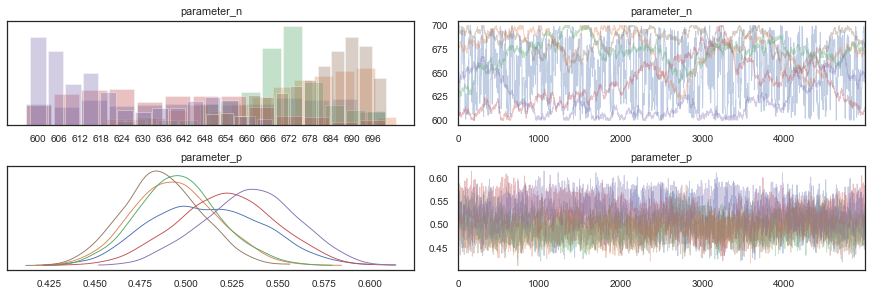

In [73]:
with build_model(GOOD_REVIEWS):
        
    # sample from the posterior distribution of the parameters
    posterior_checks = pm.sample_posterior_predictive(
        train_traces,
        var_names=['parameter_n', 'parameter_p', 'outcome']
    )
    
    pm.plot_trace(train_traces)

### PyMC3 - Model Evaluating

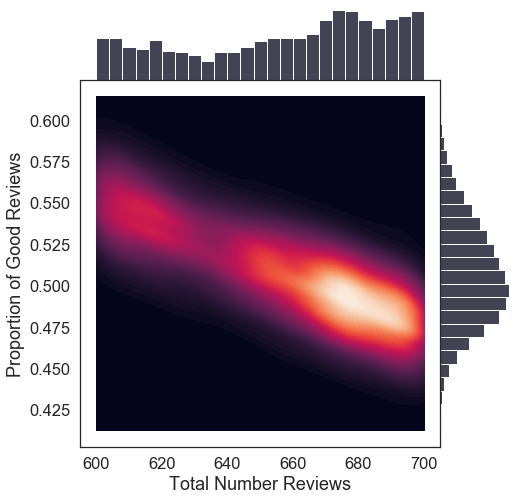

                mean      sd   hdi_3%  hdi_97%  r_hat
parameter_n  657.142  29.639  605.000  699.000   1.51
parameter_p    0.507   0.030    0.456    0.567   1.24


In [74]:
with build_model(GOOD_REVIEWS):
    
    # visualize the posterior distribution
    visualize_bivariate_parameter_grid(
        parameter_1=posterior_checks['parameter_n'], 
        parameter_2=posterior_checks['parameter_p'],
        parameter_1_name='Total Number Reviews', 
        parameter_2_name='Proportion of Good Reviews',
        height=7
    )
    
    print(pm.summary(train_traces)[['mean', 'sd', 'hdi_3%', 'hdi_97%', 'r_hat']])

### PyMC3 - Model Predicting

C:\Users\valeriob\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


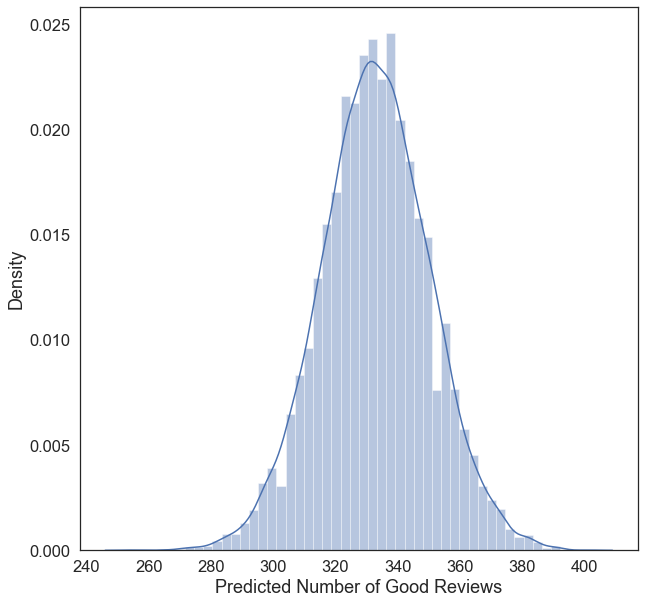

In [40]:
plt.figure(figsize=(10, 10))
sns.distplot(posterior_checks['outcome'])
plt.xlabel('Predicted Number of Good Reviews')
plt.show()

## Applied Examples

### Applied Examples - PyMC3 vs scikit-learn

### Applied Examples - Impact of Advertising Spending on Net Revenue

Real Coefficient 42.38550485581797


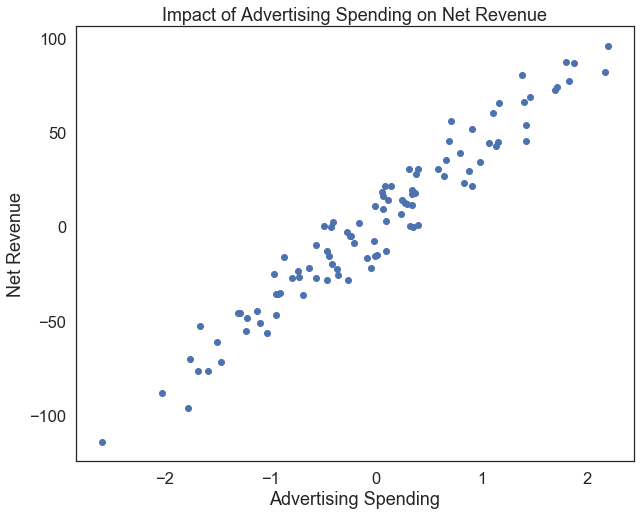

In [77]:
from modules.visuals import visualize_bivariate_regression

X, y, coef = make_regression(
    n_samples=100,
    n_features=1,
    noise=10,
    coef=True,
    random_state=0
)
X = (X - X.mean()) / X.std()
X = X.flatten()

print(f'Real Coefficient {coef}')
visualize_bivariate_regression(
    X=X,
    y=y,
    X_label='Advertising Spending',
    y_label='Net Revenue',
    title=f'Impact of Advertising Spending on Net Revenue',
)

###  <center> $\beta_0 \sim N(\mu, \sigma)$ <center> 
    
###  <center> $\beta_1 \sim N(\mu, \sigma)$ <center> 

###  <center> $\mu_i \sim \beta_0 + \beta_1 X_i$ <center> 
    
###  <center> $y_i \sim N(\mu_i, \sigma)$ <center> 

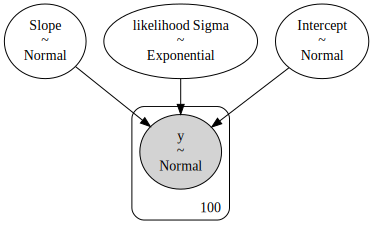

In [88]:
from modules.stats.models import BivariateNormalRegression

model = BivariateNormalRegression(
    intercept_prior=(0, 100),
    slope_prior=(0, 100),
    likelihood_sigma_prior=100,
    X=X,
    y=y
)
model.show_plate()

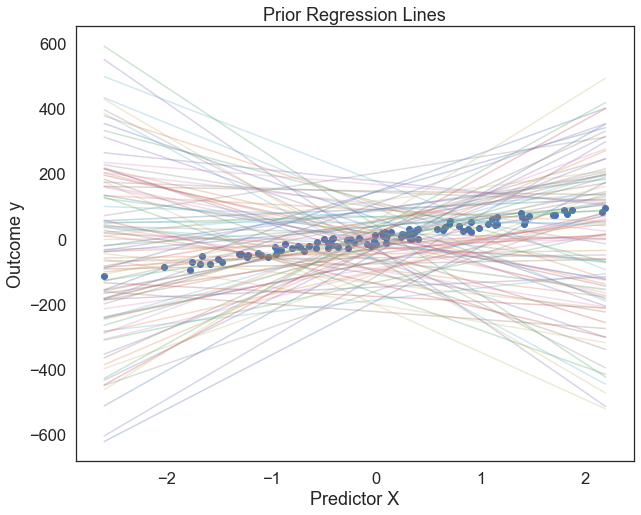

In [8]:
model.show_prior_summary()

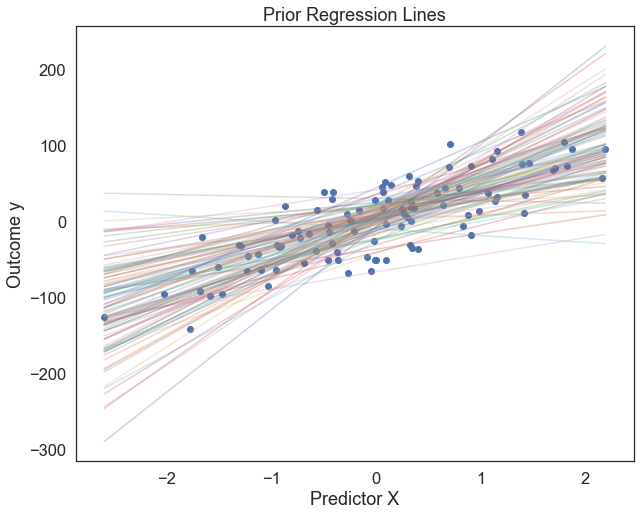

In [29]:
new_parameters = {
    'intercept_prior': (0, 10),
    'slope_prior': (42, 10),
    'likelihood_sigma_prior': 10
    
}
model.riparametrize_priors(new_parameters=new_parameters)
model.show_prior_summary()

In [30]:
model.fit(
    X, 
    y, 
    MAP=False, 
    draws=1000, 
    tune=2000,
    cores=1,
    target_accept=.90,
    chains=4
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [likelihood Sigma, Slope, Intercept]


ValueError: Mass matrix contains zeros on the diagonal. 
The derivative of RV `Slope`.ravel()[0] is zero.

In [ ]:
 model.show_posterior_summary()

### ### Applied Examples - Estimating Future Web Traffic 

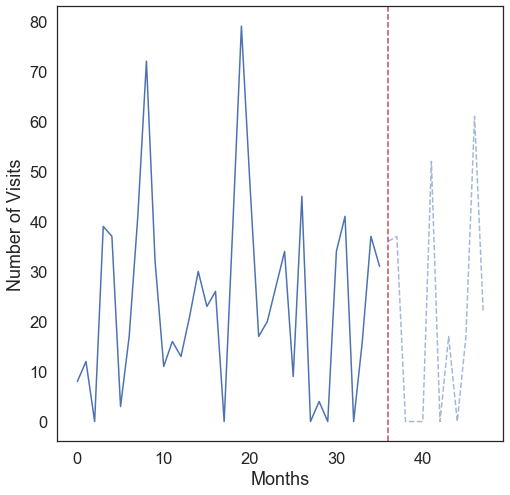

mu_noise: 20
sigma_noise: 20
Slope: 0.10877804851292126


In [13]:
from modules.utils.data_utils import generate_poisson_ar
from modules.visuals import visualize_time_series
    
process, true_parameters = generate_poisson_ar(
    lam_int=200,
    slope_a=2,
    slope_b=5,
    mu_noise=20,
    sigma_noise=20,
    burn_factor=3,
    time_steps=48
)

X = process[:-1]
y = process[1:]

X_tr = X[:-12]
y_tr = y[:-12]

X_ts = X[-12:]
y_ts = y[-12:]

visualize_time_series(
    X=[i for i in range(len(process))], 
    y=process, 
    prediction_point=36, 
    X_label='Months', 
    y_label='Number of Visits',
    figsize=(8, 8)
)
for parameter_name, parameter_value in true_parameters.items():
    
    print(f'{parameter_name}: {parameter_value}')

###  <center> $\beta \sim Beta(\alpha, \beta)$ <center>
    
### <center> $\epsilon_t \sim Normal(\mu, \sigma)$ <center>
    
###  <center> $\lambda_t \sim \beta y_{t-1} + \epsilon_t$ <center> 
    
###  <center> $\lambda_t = max(0, \lambda_t)$ <center> 
    
###  <center> $y_t \sim Poisson(\lambda_t)$ <center>

INFO (theano.gof.compilelock): Refreshing lock C:\Users\valeriob\AppData\Local\Theano\compiledir_Windows-10-10.0.17763-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.7.3-64\lock_dir\lock


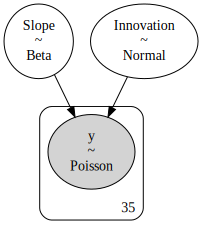

In [69]:
from modules.stats.models import PoissonAR1

ar_1_model = PoissonAR1(
    X=X_tr,
    y=y_tr,
    slope_prior=(2, 5),
    innovation_prior=(50, 50)
)
ar_1_model.show_plate()

In [70]:
ar_1_model.fit(
    X_tr, 
    y_tr, 
    MAP=False, 
    draws=4000, 
    tune=6000,
    chains=4,
    cores=1,
    target_accept=.90
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Innovation, Slope]


Sampling 4 chains for 6_000 tune and 4_000 draw iterations (24_000 + 16_000 draws total) took 61 seconds.
INFO (theano.gof.compilelock): Refreshing lock C:\Users\valeriob\AppData\Local\Theano\compiledir_Windows-10-10.0.17763-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.7.3-64\lock_dir\lock
The number of effective samples is smaller than 25% for some parameters.


MCMC Estimates

              mean     sd  hdi_3%  hdi_97%
Innovation  28.288  1.489  25.330   30.898
Slope        0.068  0.037   0.004    0.134


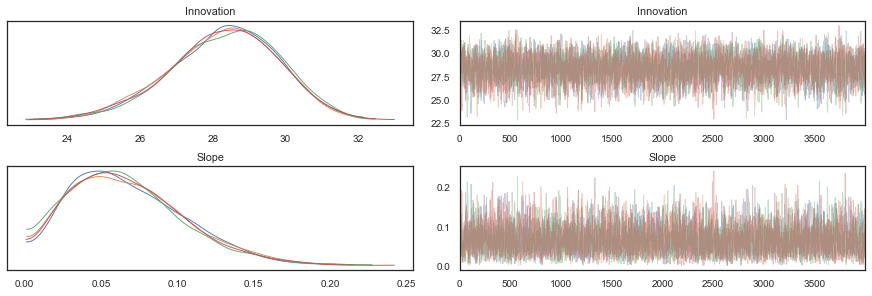

In [71]:
ar_1_model.show_posterior_summary()

In [72]:
prediction = ar_1_model.predict(X_ts, y_ts, verbose=False)

INFO (theano.gof.compilelock): Refreshing lock C:\Users\valeriob\AppData\Local\Theano\compiledir_Windows-10-10.0.17763-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.7.3-64\lock_dir\lock


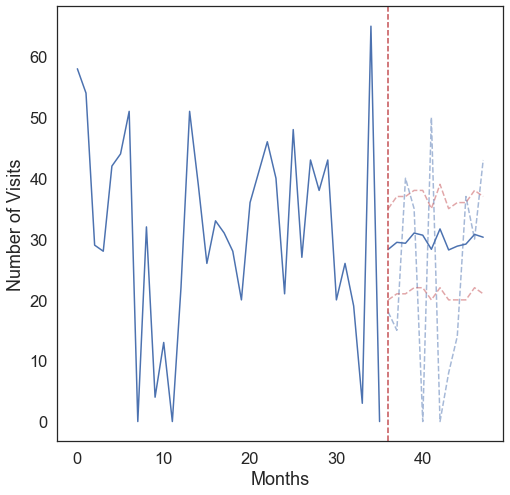

In [73]:
visualize_time_series(
    X=[i for i in range(len(process))], 
    y=process, 
    prediction=prediction['y'], 
    prediction_point=36, 
    X_label='Months', 
    y_label='Number of Visits',
    figsize=(8, 8)
)

In [66]:
prediction = []
x = X_ts[0]
for step in tqdm(range(12)):
    
    posterior_prediction = ar_1_model.predict(x, 1, verbose=False)
    prediction.append(posterior_prediction['y'])
    x = posterior_prediction['y'].mean()

prediction = np.vstack(prediction).T

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [01:08<00:00,  5.71s/it]


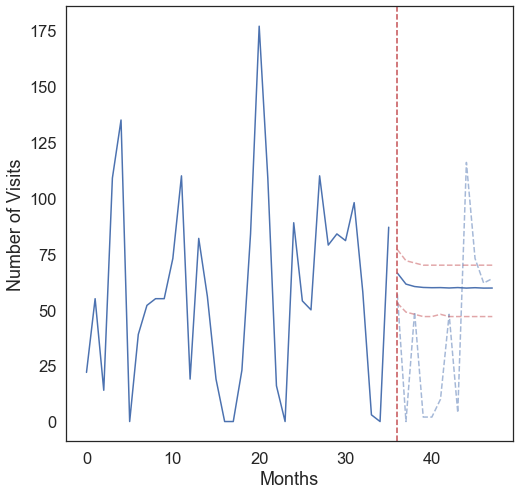

In [67]:
visualize_time_series(
    X=[i for i in range(len(process))], 
    y=process, 
    prediction=prediction, 
    prediction_point=36, 
    X_label='Months', 
    y_label='Number of Visits',
    figsize=(8, 8)
)

### Applied Examples - Game Difficulty Estimation

In [53]:
from modules.utils.data_utils import generate_game_difficulty_data

df = generate_game_difficulty_data(
    players=50,
    levels=1,
    n_sessions=20
)
df.head(10)

,player_id,level,session,num_success,num_attempts
0,0,0,0,1,8
1,0,0,1,0,6
2,0,0,2,0,4
3,0,0,3,0,9
4,0,0,4,0,8
5,0,0,5,0,2
6,0,0,6,1,1
7,0,0,7,0,5
8,0,0,8,0,8
9,0,0,9,0,9


In [54]:
PLAYERS_ID = df['player_id'].values
LEVELS_ID = df['level'].values
PLAYER_ATTEMPTS = df['num_attempts'].values
PLAYER_SUCCESSES = df['num_success'].values

coords = {
    'Players': np.unique(PLAYERS_ID), 
    'Levels': np.unique(LEVELS_ID),
    'obs_id': np.arange(PLAYER_SUCCESSES.size)
}
with pm.Model(coords=coords) as model:
    players_idx = pm.Data('players_idx', PLAYERS_ID, dims='obs_id')
    levels_idx = pm.Data('levels_idx', LEVELS_ID, dims='obs_id')
    
    hyper_player_mu = pm.Normal('player_ability_mu', 0, 2)
    hyper_level_mu = pm.Normal('level_difficulty_mu', 0, 2)
    hyper_sigma = pm.HalfNormal('hyper_sigma', 2.)
    
    player_ability = pm.Normal('player_ability', hyper_player_mu, hyper_sigma, dims='Players')
    level_difficulty = pm.Normal('level_difficulty', hyper_level_mu, hyper_sigma, dims='Levels')
    
    delta = pm.Deterministic(
        'delta = player_ability - level_difficulty', 
        player_ability[players_idx] - level_difficulty[levels_idx]
    )
    
    probability_success = pm.Deterministic('p = sigmoid(delta)', pm.math.sigmoid(delta))
    
    outcome = pm.Binomial(
        'observed_success', 
        p=probability_success, 
        n=PLAYER_ATTEMPTS, 
        observed=PLAYER_SUCCESSES, 
        dims='obs_id'
    )

In [55]:
model.check_test_point()

player_ability_mu        -1.61
level_difficulty_mu      -1.61
hyper_sigma_log__        -0.77
player_ability          -69.31
level_difficulty         -1.39
observed_success      -2735.92
Name: Log-probability of test_point, dtype: float64

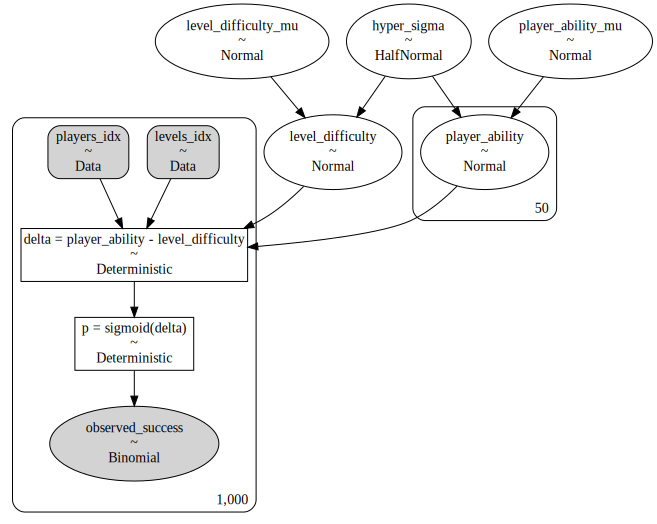

In [56]:
with model:
    
    plate = pm.model_graph.model_to_graphviz()

plate

In [57]:
with model:
    
    traces = pm.sample(
        1000, 
        tune=2000, 
        chains=2, 
        cores=1,
        target_accept=.90
    ) # Theano on windows forces cores =1 for avoiding dead kernel

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [level_difficulty, player_ability, hyper_sigma, level_difficulty_mu, player_ability_mu]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 323 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


KeyboardInterrupt: 

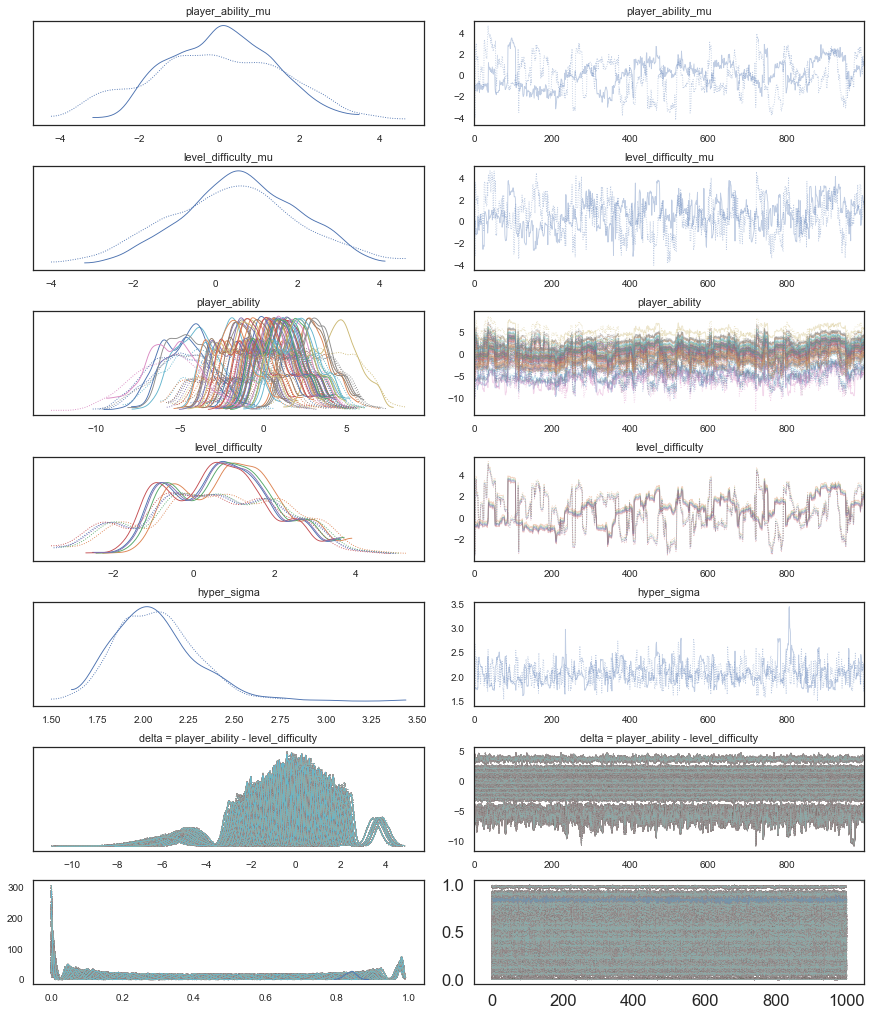

In [47]:
with model:
    
    pm.plot_trace(traces, compact=True)

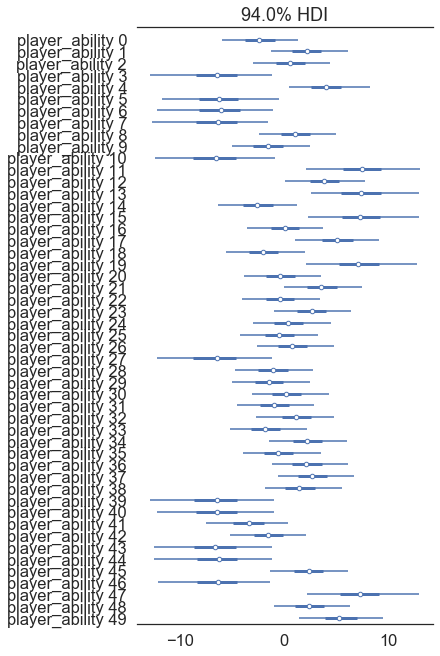

In [58]:
with model:
    
    pm.plot_forest(
        data=traces, 
        var_names=['player_ability'],
        combined=True
    )

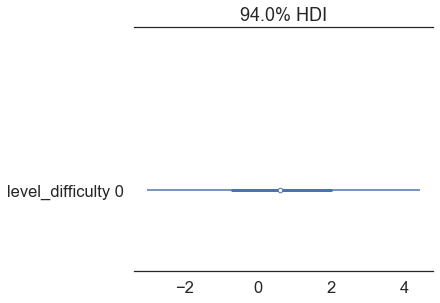

In [59]:
with model:
    
    pm.plot_forest(
        data=traces, 
        var_names=['level_difficulty'],
        combined=True
    )

### Applied Examples - Model Comparison

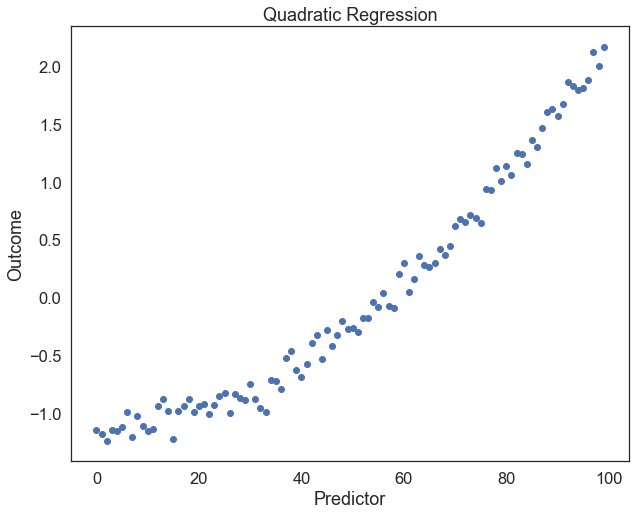

In [106]:
from modules.utils.data_utils import generate_polynomial
from modules.stats.models import PolynomialRegression


X, y = generate_polynomial(
    X=[i for i in range(100)],
    degree=2,
    noise_ratio=0.1
)
visualize_bivariate_regression(
    X=X,
    y=y,
    X_label='Predictor',
    y_label='Outcome',
    title=f'Quadratic Regression',
)

In [107]:
models = {
    'Linear': BivariateNormalRegression(
        intercept_prior=(0, 1),
        slope_prior=(0, 1),
        likelihood_sigma_prior=1,
        X=X,
        y=y
    ),
    'Quadratic': PolynomialRegression(
        X=X,
        y=y,
        cubic=False
    ),
    
    'Cubic': PolynomialRegression(
        X=X,
        y=y,
        cubic=True
    )
}

for name, model in models.items():
    
    print(f'Sampling from {name}')
    model.fit(
        X, 
        y, 
        MAP=False, 
        draws=1000, 
        tune=1000,
        chains=2,
        cores=1,
        target_accept=.90,
        init='adapt_diag'
    )

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Sampling from Linear


Sequential sampling (2 chains in 1 job)
NUTS: [likelihood Sigma, Slope, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 10 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Sampling from Quadratic


Sequential sampling (2 chains in 1 job)
NUTS: [Sigma, Slope_1, Slope, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 29 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


Sampling from Cubic


Sequential sampling (2 chains in 1 job)
NUTS: [Sigma, Slope_2, Slope_1, Slope, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 82 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [108]:
df_results = pm.compare(
    {name: model.get_traces() for name, model in models.items()},
    ic='loo',
    scale='log'
)
df_results

C:\Users\valeriob\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\stats\stats.py:151: UserWarning: 
The scale is now log by default. Use 'scale' argument or 'stats.ic_scale' rcParam if you rely on a specific value.
A higher log-score (or a lower deviance) indicates a model with better predictive accuracy.
  "\nThe scale is now log by default. Use 'scale' argument or "
C:\Users\valeriob\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
C:\Users\valeriob\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Ma

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
Quadratic,0,94.8793,3.49981,0,0.664433,6.09754,0,False,log
Cubic,1,94.1276,4.28765,0.751705,0.335567,5.00607,0.679043,False,log
Linear,2,-8.10008,2.9521,102.979,7.15837e-36,6.37549,7.49731,False,log


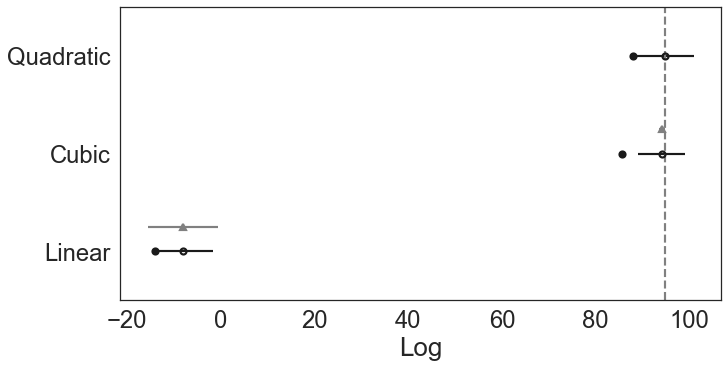

In [109]:
pm.plot_compare(
    df_results,
    figsize=(10, 5)
)